In [1]:
import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data

stacja   rok  miesiąc  dzień  temperatura  suma opadów  \
0     KRAKÓW-OBSERWATORIUM  2014        1      1          0.3          0.0   
1     KRAKÓW-OBSERWATORIUM  2014        1      2         -1.5          0.0   
2     KRAKÓW-OBSERWATORIUM  2014        1      3          2.0          0.0   
3     KRAKÓW-OBSERWATORIUM  2014        1      4          2.7          1.7   
4     KRAKÓW-OBSERWATORIUM  2014        1      5          7.0          0.9   
...                    ...   ...      ...    ...          ...          ...   
3525  KRAKÓW-OBSERWATORIUM  2023        8     27         22.2          0.5   
3526  KRAKÓW-OBSERWATORIUM  2023        8     28         19.7          0.1   
3527  KRAKÓW-OBSERWATORIUM  2023        8     29         21.0          0.9   
3528  KRAKÓW-OBSERWATORIUM  2023        8     30         18.5          0.3   
3529  KRAKÓW-OBSERWATORIUM  2023        8     31         17.4          0.1   

      wilgotność  prędkość wiatru  zachmurzenine  PM2.5  
0           94.5              0.7            7.3   94.0  
1           89.5              1.0            4.3  135.0  
2           88.5              0.3            1.7  172.0  
3           88.5              0.3            6.0  135.0  
4           87.8              0.7            7.0   68.0  
...          ...              ...            ...    ...  
3525        85.3              0.7            3.7    9.9  
3526        89.5              1.7            8.0    8.4  
3527        89.0              1.0            7.7   10.2  
3528        89.5              1.3            7.7    8.4  
3529        82.5              1.7            4.7    5.0  

[3530 rows x 10 columns]

In [2]:
print(model_data["PM2.5"].isna().sum())

43


In [3]:
model_data = model_data.dropna(subset=["PM2.5"])
print(model_data["PM2.5"].isna().sum())

0


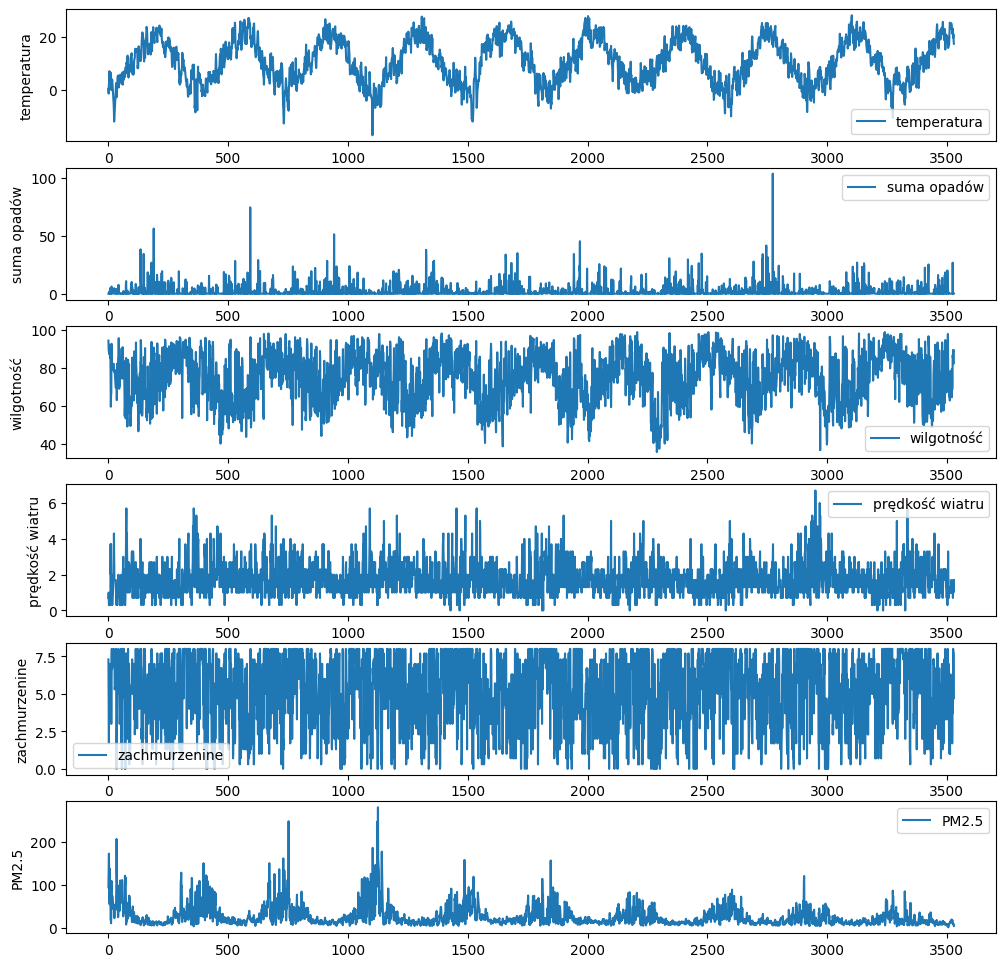

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 1, figsize=(12, 12))

columns = ["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "PM2.5"]

for i, column in enumerate(columns):
    axs[i].plot(model_data.index, model_data[column], label=column)
    axs[i].set_ylabel(column)


for ax in axs:
    ax.legend()

plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame()
columns_to_standardize =  ["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "PM2.5"]
scaled_data[columns_to_standardize] = scaler.fit_transform(model_data[columns_to_standardize])
scaled_data

temperatura  suma opadów  wilgotność  prędkość wiatru  zachmurzenine  \
0       -1.263997    -0.385199    1.526081        -1.213571       0.913062   
1       -1.486734    -0.385199    1.139045        -0.875087      -0.379434   
2       -1.053635    -0.385199    1.061638        -1.664882      -1.499597   
3       -0.967015    -0.057996    1.061638        -1.664882       0.352981   
4       -0.434923    -0.211974    1.007453        -1.213571       0.783813   
...           ...          ...         ...              ...            ...   
3482     1.445963    -0.288963    0.813935        -1.213571      -0.637933   
3483     1.136607    -0.365952    1.139045        -0.085292       1.214645   
3484     1.297472    -0.211974    1.100342        -0.875087       1.085395   
3485     0.988116    -0.327457    1.139045        -0.536604       1.085395   
3486     0.851999    -0.365952    0.597196        -0.085292      -0.207101   

         PM2.5  
0     2.768810  
1     4.456699  
2     5.979916  
3     4.456699  
4     1.698441  
...        ...  
3482 -0.693421  
3483 -0.755173  
3484 -0.681070  
3485 -0.755173  
3486 -0.895144  

[3487 rows x 6 columns]

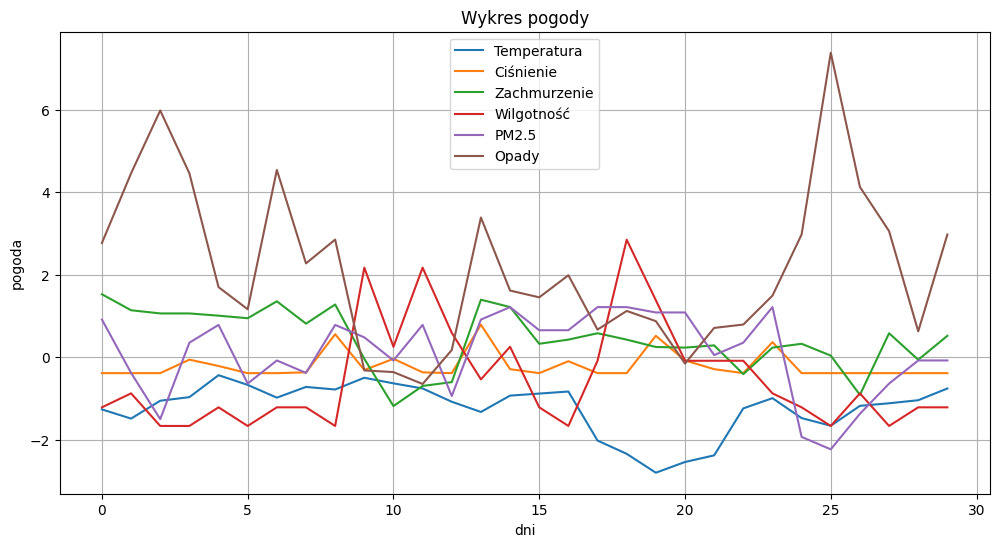

In [6]:
plt.figure(figsize=(12, 6)) 



x = range(len(scaled_data))
y1 = scaled_data['temperatura'][:30]
y2 = scaled_data['suma opadów'][:30]
y3 = scaled_data['wilgotność'][:30]
y4 = scaled_data['prędkość wiatru'][:30]
y5 = scaled_data['zachmurzenine'][:30]
y6 = scaled_data['PM2.5'][:30]


plt.plot(x[:30], y1, label='Temperatura')
plt.plot(x[:30], y2, label='Ciśnienie')
plt.plot(x[:30], y3, label='Zachmurzenie')
plt.plot(x[:30], y4, label='Wilgotność')
plt.plot(x[:30], y5, label='PM2.5')
plt.plot(x[:30], y6, label='Opady')


plt.xlabel('dni')
plt.ylabel('pogoda')
plt.title('Wykres pogody')
plt.legend()
plt.grid()
plt.show()

In [7]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score
# from sklearn.model_selection import train_test_split


# X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
# y = model_data['PM2.5']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002,random_state=42)


# n_estimators_range = list(range(100, 2001, 100))


# r2_scores = []


# for n_estimators in n_estimators_range:
#     model = RandomForestRegressor(n_estimators=n_estimators, max_depth=100, min_samples_split=5)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     r2_scores.append(r2)


# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-')
# plt.title('Zmiana R^2 Score w zależności od n_estimators')
# plt.xlabel('n_estimators')
# plt.ylabel('R^2 Score')
# plt.grid(True)
# plt.show()


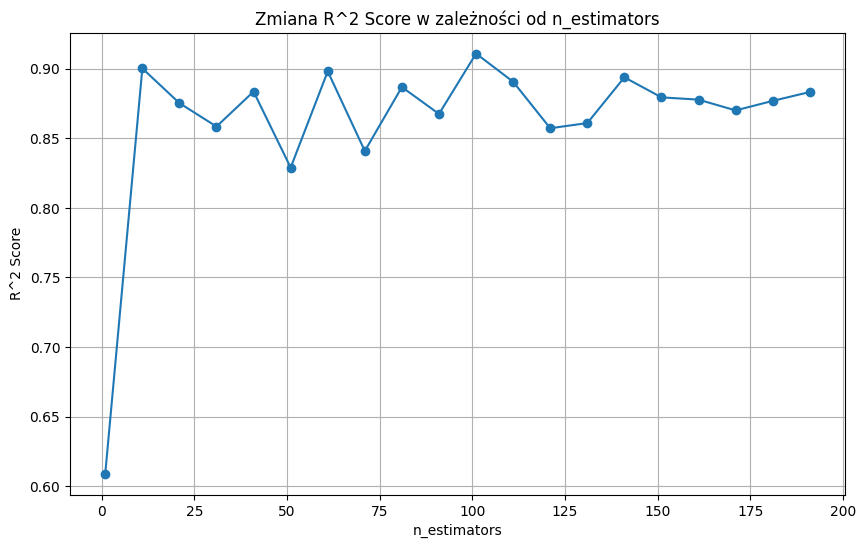

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002,random_state=42)


n_estimators_range = list(range(1, 201, 10))


r2_scores = []


for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=100, min_samples_split=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-')
plt.title('Zmiana R^2 Score w zależności od n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()


In [9]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split




def objective(trial):
    X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
    y = model_data["PM2.5"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)
    X_train

    n_estimators = trial.suggest_int('n_estimators', 1, 500)
    max_depth = trial.suggest_int('max_depth', 1, 800)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5)

   
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=None, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features,
                                 min_weight_fraction_leaf=min_weight_fraction_leaf,
                                 random_state=42)


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    return r2


study = optuna.create_study(direction='maximize')  

improvement_threshold = 0.001  
stale_count = 0

best_r2 = -float('inf') 

r2_values = []  

for _ in range(11000): 
    study.optimize(objective, n_trials=1)  

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2) 

  
    if stale_count >= 11000 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value


print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)



[I 2023-10-23 07:12:37,940] A new study created in memory with name: no-name-4ad5e35a-54e6-4b6c-a686-1ead59557926
[I 2023-10-23 07:12:38,356] Trial 0 finished with value: 0.2058806846972573 and parameters: {'n_estimators': 254, 'max_depth': 191, 'min_samples_split': 30, 'min_samples_leaf': 23, 'max_features': 0.7432636599929349, 'min_weight_fraction_leaf': 0.2910327018127177}. Best is trial 0 with value: 0.2058806846972573.
[I 2023-10-23 07:12:38,675] Trial 1 finished with value: 0.16047007622415888 and parameters: {'n_estimators': 223, 'max_depth': 239, 'min_samples_split': 30, 'min_samples_leaf': 16, 'max_features': 0.4884390639504602, 'min_weight_fraction_leaf': 0.40017033859125406}. Best is trial 0 with value: 0.2058806846972573.
[I 2023-10-23 07:12:39,674] Trial 2 finished with value: 0.756626963476916 and parameters: {'n_estimators': 275, 'max_depth': 261, 'min_samples_split': 24, 'min_samples_leaf': 28, 'max_features': 0.46018338126652214, 'min_weight_fraction_leaf': 0.006271084

Najlepsze parametry: {'n_estimators': 1, 'max_depth': 33, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 0.6390979537681174, 'min_weight_fraction_leaf': 0.007928187960785146}
Najlepszy R^2 Score: 0.9398315588046317


Średni błąd kwadratowy (MSE): 37.90454988982884
Procentowa zgodność: 93.98%


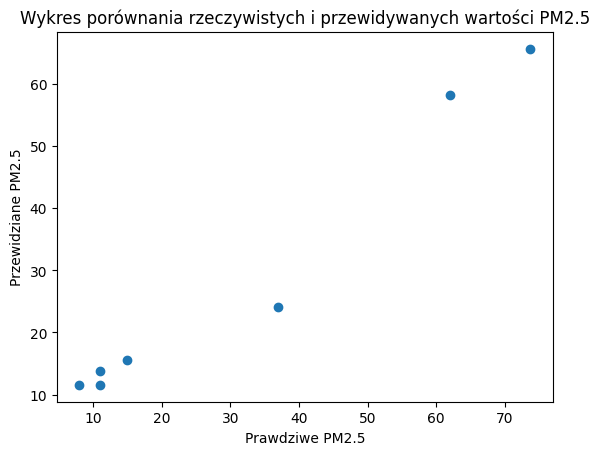

Rzeczywiste wartości (y_test)  Przewidywane wartości (y_pred)    Różnica
194                           11.00                       13.778571  -2.778571
2194                          10.98                       11.555588  -0.575588
3276                          73.73                       65.662549   8.067451
199                           15.00                       15.553871  -0.553871
1091                           8.00                       11.555588  -3.555588
80                            37.00                       24.163436  12.836564
2602                          62.02                       58.216061   3.803939

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


params =  {'n_estimators': 1, 'max_depth': 33, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 0.6390979537681174, 'min_weight_fraction_leaf': 0.007928187960785146}
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data["PM2.5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)


model = RandomForestRegressor(**params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

plt.scatter(y_test, y_pred)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results



